In [2]:
from math_verify.verifier import extract_answer, is_equiv

ModuleNotFoundError: No module named 'math_verify.verifier'

In [1]:
import wandb

# 测试基本连接
try:
    # 尝试初始化wandb
    wandb.init(project="test-connection", mode="offline")
    print("✅ wandb连接正常")
    
    # 测试在线模式
    wandb.init(project="test-online", mode="online")
    print("✅ wandb在线模式正常")
    
    # 获取当前用户信息
    api = wandb.Api()
    user = api.default_entity
    print(f"✅ 当前用户: {user}")
    
except Exception as e:
    print(f"❌ wandb连接失败: {e}")

✅ wandb连接正常


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


✅ wandb在线模式正常
✅ 当前用户: yuz285-uc-san-diego


In [1]:
import os
import multiprocessing

num_cpus = int(os.getenv("RAY_NUM_CPUS", multiprocessing.cpu_count()))

print(num_cpus)

224


In [6]:
import json

# 假设文件名为 data.json
with open("rollout_data_2025-08-26_02-26-17.json", "r") as f:
    data = json.load(f)
total_response_tokens = []
for key, item in data.items():
    if "per_turn_sum_response_tokens" in item:
        total=0
        for key, value in item["per_turn_sum_response_tokens"].items():
            total += value
        #print(total)
        total_response_tokens.append(total)
# 按 key 排序（先转 int 排序，再转回字符串取值）
sorted_keys = sorted(data.keys(), key=lambda x: int(x))

# 生成两个数组
latency = [data[k]["latency_s"] for k in sorted_keys]
reward = [data[k]["reward"] if data[k]["reward"] is not None else 0 for k in sorted_keys]
total_tokens = [ total_response_tokens for k in sorted_keys]
print("sorted_keys:", sorted_keys)
print("latency:", latency)
print("reward:", reward)
print("total_response_tokens:", total_response_tokens)



sorted_keys: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156

In [7]:
def group_mean(data, group_size=4):
    result = []
    for i in range(0, len(data), group_size):
        group = data[i:i+group_size]
        avg = sum(group) / len(group)
        result.append(avg)
    return result

def group_max(data, group_size=4):
    result = []
    for i in range(0, len(data), group_size):
        group = data[i:i+group_size]
        max_value = max(group)
        result.append(max_value)
    return result

def group_min(data, group_size=4):
    result = []
    for i in range(0, len(data), group_size):
        group = data[i:i+group_size]
        min_value = min(group)
        result.append(min_value)
    return result

ave_latency = group_mean(latency)
max_latency = group_max(latency)
min_latency = group_min(latency)
ave_reward = group_mean(reward)
max_reward = group_max(reward)
min_reward = group_min(reward)

print("ave_latency:", ave_latency)
print("ave_reward:", ave_reward)
print("max_latency:", max_latency)
print("max_reward:", max_reward)
print("min_latency:", min_latency)
print("min_reward:", min_reward)

ave_latency: [788.9651690309402, 826.5002379714279, 300.1925703762099, 784.4742730531143, 858.3899252349511, 286.4362965745386, 1032.5959428513888, 275.9801816175459, 859.7006947415648, 669.5698278748896, 873.685102177551, 651.1264695159625, 747.9045134718763, 204.58918650366832, 928.4113177494146, 868.3756601504283, 971.6645297470968, 683.9116462565726, 768.7472516559064, 767.8077075195033, 682.6877079477999, 805.5711125343805, 471.4672917400021, 746.876249351073, 598.9100403654156, 683.1709693538724, 724.5375379871111, 764.6044001156697, 899.1091635407647, 987.413020319771, 789.1392432055436, 512.1500512228813, 804.4056358207017, 730.567739526392, 358.0387120702071, 770.709441706189, 809.4297411097214, 130.29435358464252, 833.0438566169469, 729.9106178940274, 669.255174726015, 347.8492777206702, 698.099083533627, 805.2938723028637, 497.54082076530904, 474.2985744163161, 834.4292298974469, 763.9499040715164, 947.0444666579133, 794.1798086508643, 745.0417727191234, 986.0415737263393, 8

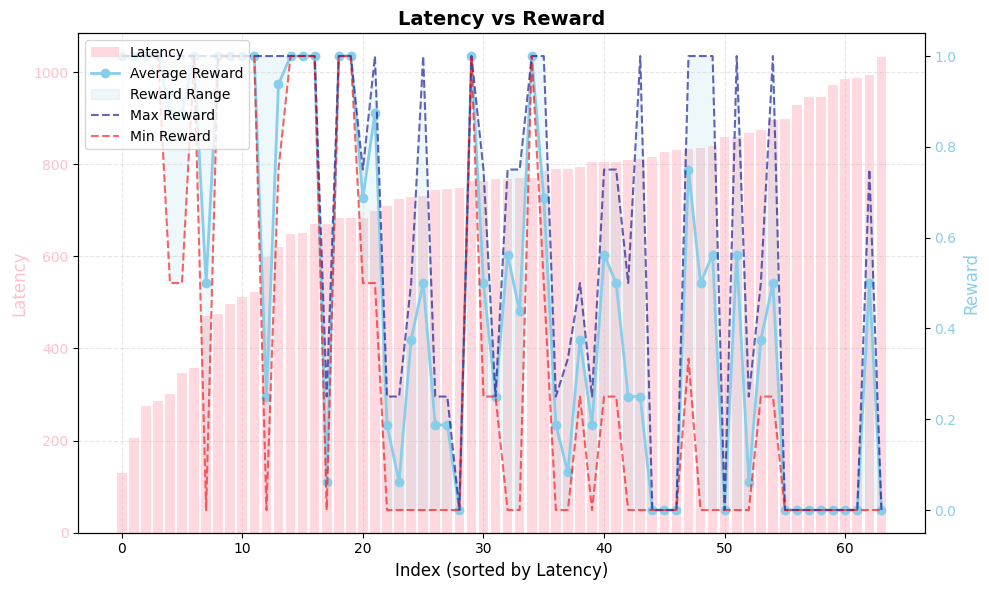

In [4]:
import matplotlib.pyplot as plt

def plot_two_series(series1, series2, series3, series4):
    """
    series1: 延迟 (柱状图, 左纵坐标)
    series2: 平均 Reward (折线, 右纵坐标)
    series3: 最大 Reward (折线, 右纵坐标, 边界线 + 半透明)
    series4: 最小 Reward (折线, 右纵坐标, 边界线 + 半透明)
    """

    if not (len(series1) == len(series2) == len(series3) == len(series4)):
        raise ValueError("所有数列长度必须一致")

    # 按照 series1 升序排序
    sorted_pairs = sorted(zip(series1, series2, series3, series4), key=lambda x: x[0])
    series1_sorted, series2_sorted, series3_sorted, series4_sorted = zip(*sorted_pairs)
    x = range(len(series1_sorted))

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 左纵坐标: Latency 柱状图
    ax1.bar(x, series1_sorted, color="pink", alpha=0.6, label="Latency")
    ax1.set_xlabel("Index (sorted by Latency)", fontsize=12)
    ax1.set_ylabel("Latency", color="pink", fontsize=12)
    ax1.tick_params(axis="y", labelcolor="pink")

    # 右纵坐标: Reward 折线
    ax2 = ax1.twinx()
    ax2.plot(x, series2_sorted, color="skyblue", marker="o", linewidth=2, label="Average Reward")

    # 最大值和最小值之间加阴影
    ax2.fill_between(x, series4_sorted, series3_sorted, color="lightblue", alpha=0.2, label="Reward Range")

    # 最大值、最小值曲线（更透明）
    ax2.plot(x, series3_sorted, color="darkblue", linestyle="--", alpha=0.6, linewidth=1.5, label="Max Reward")
    ax2.plot(x, series4_sorted, color="red", linestyle="--", alpha=0.6, linewidth=1.5, label="Min Reward")

    ax2.set_ylabel("Reward", color="skyblue", fontsize=12)
    ax2.tick_params(axis="y", labelcolor="skyblue")

    # 标题 + 网格 + 图例
    plt.title("Latency vs Reward", fontsize=14, fontweight="bold")
    ax1.grid(alpha=0.3, linestyle="--")

    # 合并图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=10)

    fig.tight_layout()
    plt.show()


# 示例调用
# plot_two_series(ave_latency, ave_reward, max_reward, min_reward)



plot_two_series(ave_latency, ave_reward,max_reward,min_reward)


In [9]:
def group_mean(data, group_size=4):
    result = []
    for i in range(0, len(data), group_size):
        group = data[i:i+group_size]
        avg = sum(group) / len(group)
        result.append(avg)
    return result

def group_max(data, group_size=4):
    result = []
    for i in range(0, len(data), group_size):
        group = data[i:i+group_size]
        max_value = max(group)
        result.append(max_value)
    return result

def group_min(data, group_size=4):
    result = []
    for i in range(0, len(data), group_size):
        group = data[i:i+group_size]
        min_value = min(group)
        result.append(min_value)
    return result

ave_total_response_tokens = group_mean(total_response_tokens)
max_total_response_tokens = group_max(total_response_tokens)
min_total_response_tokens = group_min(total_response_tokens)
ave_reward = group_mean(reward)
max_reward = group_max(reward)
min_reward = group_min(reward)

print("ave_total_response_tokens:", ave_total_response_tokens)
print("ave_reward:", ave_reward)
print("max_total_response_tokens:", max_total_response_tokens)
print("max_reward:", max_reward)
print("min_total_response_tokens:", min_total_response_tokens)
print("min_reward:", min_reward)

ave_total_response_tokens: [1034.5, 1300.25, 1561.75, 2091.0, 2458.5, 2732.75, 3813.5, 4432.75, 5242.25, 5759.0, 6062.5, 7646.0, 7192.0, 6866.75, 7404.0, 7622.0, 7135.5, 6854.25, 7839.5, 7826.5, 8422.75, 8103.25, 8323.0, 8458.5, 9086.0, 9375.5, 9541.0, 9515.75, 9295.0, 10067.5, 9952.5, 10372.5, 10547.0, 10004.75, 10701.5, 10414.75, 10174.75, 11302.25, 11205.0, 11135.0, 11499.5, 11487.0, 11182.75, 10827.5, 12003.25, 12297.5, 12491.75, 11977.5, 12244.25, 12403.0, 11977.0, 12539.75, 13348.25, 12416.5, 13980.25, 14616.5, 12320.0, 11386.75, 15120.25, 15914.0, 15085.75, 14253.0, 14935.5, 15182.0]
ave_reward: [0.1875, 0.0, 0.875, 0.6875, 0.0, 1.0, 0.0, 1.0, 0.5625, 0.0625, 0.375, 1.0, 0.0, 1.0, 0.0, 0.0625, 0.0, 0.6875, 0.5625, 0.25, 1.0, 0.5, 0.5, 0.1875, 0.25, 1.0, 0.0625, 0.5, 0.0, 0.0, 0.08333333333333333, 1.0, 0.1875, 0.5, 1.0, 1.0, 0.25, 1.0, 0.75, 0.375, 1.0, 0.875, 0.875, 0.5625, 1.0, 1.0, 0.5, 1.0, 0.0, 0.375, 0.1875, 0.0, 0.0, 0.5, 1.0, 0.9375, 0.1875, 0.25, 1.0, 0.0, 0.5625, 0.0, 0

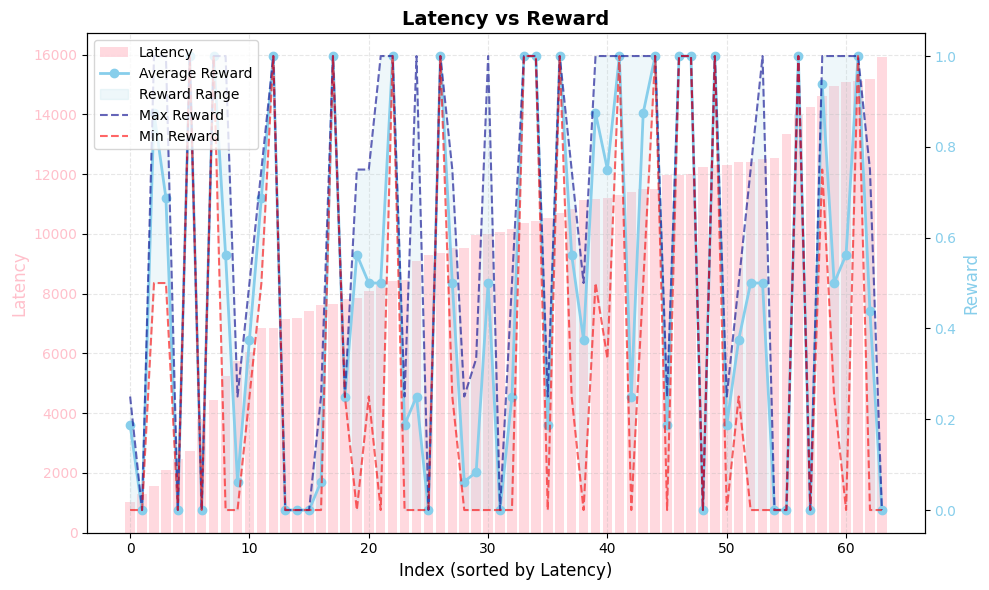

In [10]:
import matplotlib.pyplot as plt

def plot_two_series(series1, series2, series3, series4):
    """
    series1: 延迟 (柱状图, 左纵坐标)
    series2: 平均 Reward (折线, 右纵坐标)
    series3: 最大 Reward (折线, 右纵坐标, 边界线 + 半透明)
    series4: 最小 Reward (折线, 右纵坐标, 边界线 + 半透明)
    """

    if not (len(series1) == len(series2) == len(series3) == len(series4)):
        raise ValueError("所有数列长度必须一致")

    # 按照 series1 升序排序
    sorted_pairs = sorted(zip(series1, series2, series3, series4), key=lambda x: x[0])
    series1_sorted, series2_sorted, series3_sorted, series4_sorted = zip(*sorted_pairs)
    x = range(len(series1_sorted))

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 左纵坐标: Latency 柱状图
    ax1.bar(x, series1_sorted, color="pink", alpha=0.6, label="Latency")
    ax1.set_xlabel("Index (sorted by Latency)", fontsize=12)
    ax1.set_ylabel("Latency", color="pink", fontsize=12)
    ax1.tick_params(axis="y", labelcolor="pink")

    # 右纵坐标: Reward 折线
    ax2 = ax1.twinx()
    ax2.plot(x, series2_sorted, color="skyblue", marker="o", linewidth=2, label="Average Reward")

    # 最大值和最小值之间加阴影
    ax2.fill_between(x, series4_sorted, series3_sorted, color="lightblue", alpha=0.2, label="Reward Range")

    # 最大值、最小值曲线（更透明）
    ax2.plot(x, series3_sorted, color="darkblue", linestyle="--", alpha=0.6, linewidth=1.5, label="Max Reward")
    ax2.plot(x, series4_sorted, color="red", linestyle="--", alpha=0.6, linewidth=1.5, label="Min Reward")

    ax2.set_ylabel("Reward", color="skyblue", fontsize=12)
    ax2.tick_params(axis="y", labelcolor="skyblue")

    # 标题 + 网格 + 图例
    plt.title("Latency vs Reward", fontsize=14, fontweight="bold")
    ax1.grid(alpha=0.3, linestyle="--")

    # 合并图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=10)

    fig.tight_layout()
    plt.show()


# 示例调用
# plot_two_series(ave_latency, ave_reward, max_reward, min_reward)



plot_two_series(ave_total_response_tokens, ave_reward,max_reward,min_reward)
